In [1]:
# importing libraries needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# reading data from a json file usin pandas
df = pd.read_json("BC_data/Informações Diárias Detalhado.json")

In [3]:
df.head(5) # showing the first 5 lines

,@odata.context,value
0,https://was-p.bcnet.bcb.gov.br/olinda/servico/...,"{'Data': '1994-11-22', 'Quantidade': 204914511..."
1,https://was-p.bcnet.bcb.gov.br/olinda/servico/...,"{'Data': '2019-09-13', 'Quantidade': 120033288..."
2,https://was-p.bcnet.bcb.gov.br/olinda/servico/...,"{'Data': '2019-09-13', 'Quantidade': 539298143..."
3,https://was-p.bcnet.bcb.gov.br/olinda/servico/...,"{'Data': '2019-09-13', 'Quantidade': 568115914..."
4,https://was-p.bcnet.bcb.gov.br/olinda/servico/...,"{'Data': '2019-09-13', 'Quantidade': 266150993..."


In [4]:
# we are interested on value column
df.value.head(5)

0    {'Data': '1994-11-22', 'Quantidade': 204914511...
1    {'Data': '2019-09-13', 'Quantidade': 120033288...
2    {'Data': '2019-09-13', 'Quantidade': 539298143...
3    {'Data': '2019-09-13', 'Quantidade': 568115914...
4    {'Data': '2019-09-13', 'Quantidade': 266150993...
Name: value, dtype: object

# Understanding the data

Outstanding Money

Daily records of the number of banknotes and coins in circulation (commemorative coins are not included). The information is separated for each species (banknote or currency), family (category) and denomination of the Real (symbols: R $, BRL).

Data link: [central bank ](https://dadosabertos.bcb.gov.br/dataset/dinheiro-em-circulao)


In [5]:
# getting some overview
df.value.head(5).values


array([{'Data': '1994-11-22', 'Quantidade': 204914511, 'Valor': 1024572555.0, 'Categoria': 'Cédulas - 1a. família', 'Denominacao': '5.00', 'Especie': 'Cédulas'},
       {'Data': '2019-09-13', 'Quantidade': 1200332884, 'Valor': 12003328.84, 'Categoria': 'Moedas - 2a. Família', 'Denominacao': '0.01', 'Especie': 'Moedas'},
       {'Data': '2019-09-13', 'Quantidade': 5392981432, 'Valor': 269649071.6, 'Categoria': 'Moedas - 2a. Família', 'Denominacao': '0.05', 'Especie': 'Moedas'},
       {'Data': '2019-09-13', 'Quantidade': 5681159148, 'Valor': 568115914.8, 'Categoria': 'Moedas - 2a. Família', 'Denominacao': '0.10', 'Especie': 'Moedas'},
       {'Data': '2019-09-13', 'Quantidade': 2661509938, 'Valor': 665377484.5, 'Categoria': 'Moedas - 2a. Família', 'Denominacao': '0.25', 'Especie': 'Moedas'}],
      dtype=object)

In [6]:
df.value.count()

152822

In [7]:
# first, we check if there is any missing value
# this step is also called data cleaning
df.isnull()

,@odata.context,value
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [8]:
df.dropna();

In [9]:
# as we can see, there is no null value
df.count()

@odata.context    152822
value             152822
dtype: int64

# The main stuff: Plotting

In [10]:
# getting data from values
data = df.value.values

In [11]:
data[0] # each element in a numpy array

{'Data': '1994-11-22',
 'Quantidade': 204914511,
 'Valor': 1024572555.0,
 'Categoria': 'Cédulas - 1a. família',
 'Denominacao': '5.00',
 'Especie': 'Cédulas'}

In [23]:
# we can manipulate "data" using pandas time series date
# and we're gonna need "Valor" as well
# so we add all values in 2 lists for later manipulation
date = []
value_amount = []
denomination = []
quantity = []
for i in range(len(data)):
    date.append(data[i]['Data'])
    value_amount.append(data[i]['Valor'])
    denomination.append(data[i]['Denominacao'])
    quantity.append(data[i]['Quantidade'])

In [24]:
# the dates are unordered, we need to order without losing the value_amount index
# there are many ways to do that, but i'm going to transform in a pandas dataframe and sort it from there
main_df = pd.DataFrame(np.array([date, value_amount, quantity, denomination]).transpose(), columns=['date', 'value_amount', 'quantity','denomination'])

In [25]:
main_df.head()

,date,value_amount,quantity,denomination
0,1994-11-22,1024572555.0,204914511,5.00
1,2019-09-13,12003328.84,1200332884,0.01
2,2019-09-13,269649071.6,5392981432,0.05
3,2019-09-13,568115914.8,5681159148,0.10
4,2019-09-13,665377484.5,2661509938,0.25


In [26]:
main_df.sort_values(by="date", inplace=True)

In [27]:
main_df.head() # everything done! ready to plot

,date,value_amount,quantity,denomination
48,1994-10-03,2736309830.0,273630983,10.00
46,1994-10-03,267853898.0,267853898,1.00
47,1994-10-03,1264610870.0,252922174,5.00
49,1994-10-03,1447274300.0,28945486,50.00
56,1994-10-03,181609358.0,181609358,1.00


So, we have data from each day ranging from 1994 to 2020. I'ts a lot of data!

I'm gonna groupby year and plot it. The detailed version of each day can be better 
viewed on d3.js later on.

The amount of money in circulation each day is different, it can be influenced by many factors.

But i'll take the date 12/31 of each year, just for the sake of the plotting.

To do the precise calculation of the amount of money in a day, we need to sum up all different
denomination value_amounts


In [187]:
main_df.to_csv('data_generated/money_amount', index=None)


In [122]:
def save_years_amount(dataframe, years):
    """
    sums up the value amount and return
    all the value_amounts and dates correspondent
    """
    dates = []
    amounts = []
    
    for i in years:
        aux = str(i)+'-10-03'
        amount = dataframe[dataframe['date'] == aux]
        
        while amount.empty: 
            aux = pd.to_datetime(aux) # convert to datetime
            plus_1 = pd.Timedelta(1, unit='D') # increase one day
            aux = aux + plus_1
            amount = dataframe[dataframe['date'] == aux.date().strftime('%Y-%m-%d')] # searching the specified date
            
        dates.append(str(i))
        amounts.append(amount.value_amount.values.astype(np.float).sum())
    return dates, amounts
        
            

In [161]:
dates, amounts = save_years_amount(main_df, range(1994, 2020))

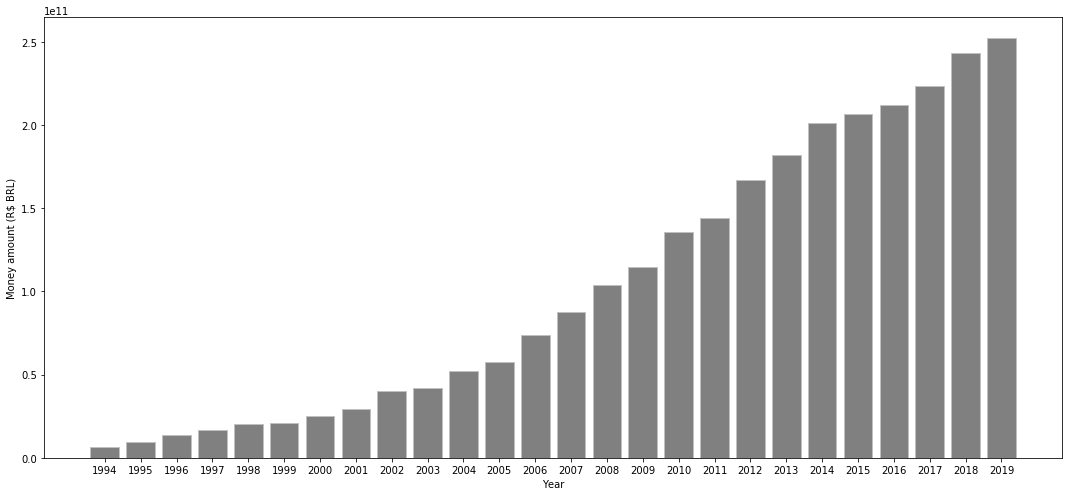

In [185]:
fig, ax = plt.subplots(figsize=(15, 7))
ax.bar(dates, amounts, color=['gray'], edgecolor=['silver'] , linewidth=1)
ax.set_ylabel("Money amount (R$ BRL)")
ax.set_xlabel("Year")
fig.tight_layout()
plt.savefig('graphs/money_amount_bar_graph')

In [183]:
main_df[main_df['date'] == '2019-10-03'].value_amount.values.astype(np.float).sum()

252092767131.06